In [1]:
# Load Libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [2]:
# Load dataset
import pandas as pd
url = "https://gist.githubusercontent.com/netj/8836201/raw/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)


In [3]:
# Assuming you already loaded your dataset into the variable `dataset`, like:
# dataset = pd.read_csv('your_file.csv')

# a. Check number of instances (rows) and attributes (columns)
print(dataset.shape)

# b. Take a peek at the first 20 rows of the data
print(dataset.head(20))

# c. Get count, mean, min, max, and percentiles for each column
print(dataset.describe())

# d. Check number of instances that belong to each class
print(dataset.groupby('class').size())


(151, 5)
    sepal-length  sepal-width  petal-length  petal-width    class
0   sepal.length  sepal.width  petal.length  petal.width  variety
1            5.1          3.5           1.4           .2   Setosa
2            4.9            3           1.4           .2   Setosa
3            4.7          3.2           1.3           .2   Setosa
4            4.6          3.1           1.5           .2   Setosa
5              5          3.6           1.4           .2   Setosa
6            5.4          3.9           1.7           .4   Setosa
7            4.6          3.4           1.4           .3   Setosa
8              5          3.4           1.5           .2   Setosa
9            4.4          2.9           1.4           .2   Setosa
10           4.9          3.1           1.5           .1   Setosa
11           5.4          3.7           1.5           .2   Setosa
12           4.8          3.4           1.6           .2   Setosa
13           4.8            3           1.4           .1   Setosa
1

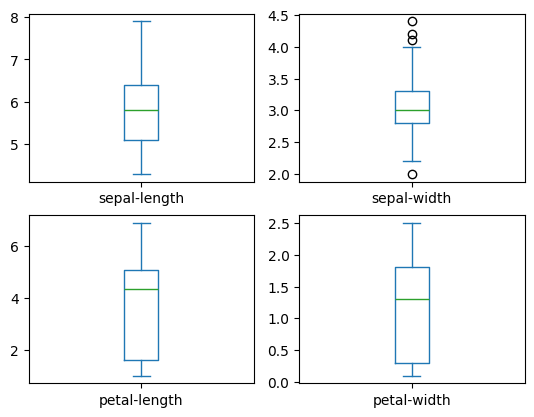

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load iris dataset from sklearn
iris = load_iris()

# Create DataFrame using only numeric data
dataset = pd.DataFrame(iris.data, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])

# Create univariate box plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()


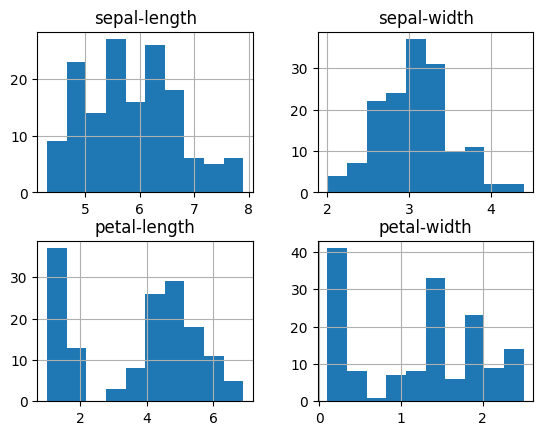

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
dataset = pd.DataFrame(iris.data, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])

# Create histograms
dataset.hist()
plt.show()


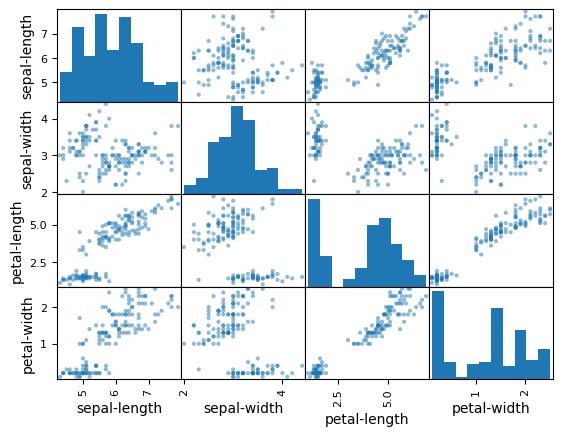

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
dataset = pd.DataFrame(iris.data, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])

# Create scatter matrix plot
scatter_matrix(dataset)
plt.show()


In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
dataset = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dataset['class'] = iris.target  # add target/label as a column

# Convert DataFrame to numpy array
array = dataset.values

# Split into input (X) and output (y)
X = array[:, 0:4]
y = array[:, 4]

# Split into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


In [8]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


/opt/anaconda3/envs/iRI_2025_NSK/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/iRI_2025_NSK/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/opt/anaconda3/envs/iRI_2025_NSK/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this wa

In [9]:
from sklearn.svm import SVC

# Based on previous cross-validation results, assume SVM had the highest accuracy.
model = SVC(gamma='auto')

# Train the model using the training data
model.fit(X_train, Y_train)

# Make predictions on the validation set
predictions = model.predict(X_validation)


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.92      0.96        13
         2.0       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

